In [1]:
#Notebook to simulate shocks for same periods across regions A and B


# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, root

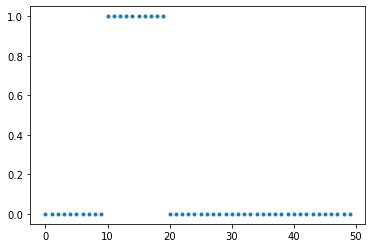

In [2]:
#Creating the series of shocks

T = 50
t, tt = 10, 20     #period between t and tt: health shocks z=0

zAv = []
zBv = zAv

for j in range(0,T):
    if j < t or j >=tt:
        zA = 0          #no health shocks
        zAv.append(zA)
    else:
        zA = 1          #health shocks
        zAv.append(zA)

z = np.array(zAv)

plt.plot(z, '.')
plt.show()

In [5]:
# Parameter values

#Agents
beta  = 0.99
a     = 0.756
omega = 1.5 

#Firms
alpha  = 0.70
KA     = 6.04 
chi_0A   = 0.1 
chi_1A   = 6.1 

H = 1
hstarA = 0.0948 
gamma1 = 0.20
h = H / gamma1   #(H/gamma1)
theta  = 0.0918


tau = 0.15

In [20]:
#mstar function: we need to find the root of the function
#expression (27), p.5, September 25 notes

#def bb_m(m,z):
    
#    expoM = chi_1A*omega + alpha*omega - omega - alpha*chi_1A
#    mstarpar = (chi_0A**(alpha-omega))*(alpha**alpha)*((1-tau)**alpha)*((1-alpha)**(omega-alpha)*(KA**(alpha*(1-omega))))
    
    #phiA  = 1 
#    phiA = hstarA / (hstarA + z*theta*m*KA)  #(hstarA + z*0.20)
    
#    bbm = ((phiA**alpha)*mstarpar) - m**(expoM)
#    return bbm.flatten()


#res = root(lambda x: bb_m(x,z), x0=np.ones(z.size))
#mstar_t = res.x

#plt.plot(mstar_t)
#mstar_t

In [6]:
expoM = chi_1A*omega + alpha*omega - omega - alpha*chi_1A
mstarpar = (chi_0A**(alpha-omega))*(alpha**alpha)*((1-tau)**alpha)*((1-alpha)**(omega-alpha)*(KA**(alpha*(1-omega))))

phiA_t = 1 - 0.2*z

mstar_t = ((phiA_t**alpha)*mstarpar)**(1/expoM)
mstar_t

array([0.97459745, 0.97459745, 0.97459745, 0.97459745, 0.97459745,
       0.97459745, 0.97459745, 0.97459745, 0.97459745, 0.97459745,
       0.94083221, 0.94083221, 0.94083221, 0.94083221, 0.94083221,
       0.94083221, 0.94083221, 0.94083221, 0.94083221, 0.94083221,
       0.97459745, 0.97459745, 0.97459745, 0.97459745, 0.97459745,
       0.97459745, 0.97459745, 0.97459745, 0.97459745, 0.97459745,
       0.97459745, 0.97459745, 0.97459745, 0.97459745, 0.97459745,
       0.97459745, 0.97459745, 0.97459745, 0.97459745, 0.97459745,
       0.97459745, 0.97459745, 0.97459745, 0.97459745, 0.97459745,
       0.97459745, 0.97459745, 0.97459745, 0.97459745, 0.97459745])

In [7]:
fA_t = theta*mstar_t*KA       #Function that determines the impact of a health shock on health demand

hbarA_t = hstarA + z*fA_t    #subsistance level of demand for health goods
#phiA_t  = (hstarA / (hbarA_t))  #labor productivity function


#Lstar expression (28), p.5, September 25 notes
expoL    = chi_1A*omega + alpha*omega - omega - alpha*chi_1A
Lstarpar = (chi_0A**(alpha-1))*(alpha**(chi_1A+alpha-1))*((1-tau)**(chi_1A+alpha-1))*((1-alpha)**(1-alpha))*(KA**((1-alpha)*(chi_1A-1)))

Lstar_t  = (Lstarpar*(phiA_t**(chi_1A+alpha-1)))**(1/expoL)

Lstar_t  #plt.plot(Lstar_t)
Lstar_t

array([1.01588497, 1.01588497, 1.01588497, 1.01588497, 1.01588497,
       1.01588497, 1.01588497, 1.01588497, 1.01588497, 1.01588497,
       0.75851576, 0.75851576, 0.75851576, 0.75851576, 0.75851576,
       0.75851576, 0.75851576, 0.75851576, 0.75851576, 0.75851576,
       1.01588497, 1.01588497, 1.01588497, 1.01588497, 1.01588497,
       1.01588497, 1.01588497, 1.01588497, 1.01588497, 1.01588497,
       1.01588497, 1.01588497, 1.01588497, 1.01588497, 1.01588497,
       1.01588497, 1.01588497, 1.01588497, 1.01588497, 1.01588497,
       1.01588497, 1.01588497, 1.01588497, 1.01588497, 1.01588497,
       1.01588497, 1.01588497, 1.01588497, 1.01588497, 1.01588497])

In [8]:
#Equilibrium: Output, Profits, Wages and Aggregate Consumption
#expressions (29)-(32), p.6, September 25 notes

Ystar_t  = (mstar_t*KA)*(1-alpha)*Lstar_t**alpha               #Output
Pistar_t = (1-alpha)*(1-(1/chi_1A))*Ystar_t                    #Profits
wstar_t  = (1/phiA_t)*(1/(1-tau))*Lstar_t**(omega-1)           #Wages
Cstar_t  = Ystar_t - chi_0A*(((mstar_t)**chi_1A)/chi_1A)*KA

wstar_t

array([1.18577787, 1.18577787, 1.18577787, 1.18577787, 1.18577787,
       1.18577787, 1.18577787, 1.18577787, 1.18577787, 1.18577787,
       1.28077662, 1.28077662, 1.28077662, 1.28077662, 1.28077662,
       1.28077662, 1.28077662, 1.28077662, 1.28077662, 1.28077662,
       1.18577787, 1.18577787, 1.18577787, 1.18577787, 1.18577787,
       1.18577787, 1.18577787, 1.18577787, 1.18577787, 1.18577787,
       1.18577787, 1.18577787, 1.18577787, 1.18577787, 1.18577787,
       1.18577787, 1.18577787, 1.18577787, 1.18577787, 1.18577787,
       1.18577787, 1.18577787, 1.18577787, 1.18577787, 1.18577787,
       1.18577787, 1.18577787, 1.18577787, 1.18577787, 1.18577787])

In [9]:
#Equilibrium prices
#expressions (33)-(34), p.4, September 25 notes
pP_t = ((1-a)/a)*((Cstar_t - (Lstar_t**omega)/omega))/(H - hstarA - z*fA_t)

pP_t

array([0.36308202, 0.36308202, 0.36308202, 0.36308202, 0.36308202,
       0.36308202, 0.36308202, 0.36308202, 0.36308202, 0.36308202,
       0.75419965, 0.75419965, 0.75419965, 0.75419965, 0.75419965,
       0.75419965, 0.75419965, 0.75419965, 0.75419965, 0.75419965,
       0.36308202, 0.36308202, 0.36308202, 0.36308202, 0.36308202,
       0.36308202, 0.36308202, 0.36308202, 0.36308202, 0.36308202,
       0.36308202, 0.36308202, 0.36308202, 0.36308202, 0.36308202,
       0.36308202, 0.36308202, 0.36308202, 0.36308202, 0.36308202,
       0.36308202, 0.36308202, 0.36308202, 0.36308202, 0.36308202,
       0.36308202, 0.36308202, 0.36308202, 0.36308202, 0.36308202])

In [10]:
#Tax Revenue
T_t = tau*wstar_t*Lstar_t
T_t

array([0.18069209, 0.18069209, 0.18069209, 0.18069209, 0.18069209,
       0.18069209, 0.18069209, 0.18069209, 0.18069209, 0.18069209,
       0.14572339, 0.14572339, 0.14572339, 0.14572339, 0.14572339,
       0.14572339, 0.14572339, 0.14572339, 0.14572339, 0.14572339,
       0.18069209, 0.18069209, 0.18069209, 0.18069209, 0.18069209,
       0.18069209, 0.18069209, 0.18069209, 0.18069209, 0.18069209,
       0.18069209, 0.18069209, 0.18069209, 0.18069209, 0.18069209,
       0.18069209, 0.18069209, 0.18069209, 0.18069209, 0.18069209,
       0.18069209, 0.18069209, 0.18069209, 0.18069209, 0.18069209,
       0.18069209, 0.18069209, 0.18069209, 0.18069209, 0.18069209])

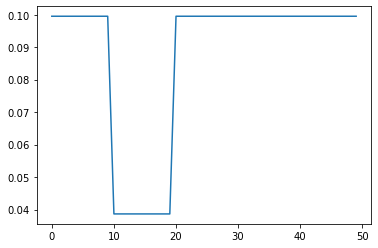

In [14]:
sigma = 0.10
gamma1 = 0.50
gamma2 = 1 - gamma1

hpub_t = sigma*T_t / (gamma2*pP_t)

#hpub_t
hT_t = ((1-a)/pP_t)*(0 + Lstar_t**omega - pP_t*hbarA_t - (Lstar_t**omega)/omega + pP_t*hpub_t) + hbarA_t

h2_t = hT_t - hpub_t

c2_t = a*(0 + Lstar_t**omega - pP_t*hbarA_t - (Lstar_t**omega)/omega + pP_t*hpub_t) + (Lstar_t**omega)/omega

plt.plot(hpub_t)

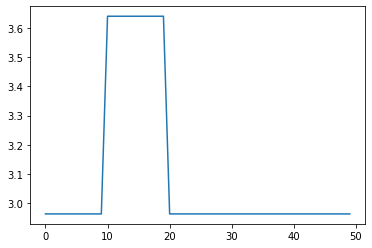

In [15]:
c1_t = a*(Pistar_t/gamma1 + pP_t*h + Lstar_t**omega - pP_t*hbarA_t - (Lstar_t**omega)/omega) + (Lstar_t**omega)/omega

h1_t = ((1-a)/pP_t)*(Pistar_t/gamma1 + pP_t*h + Lstar_t**omega - pP_t*hbarA_t - (Lstar_t**omega)/omega) + hbarA_t

plt.plot(c1_t)

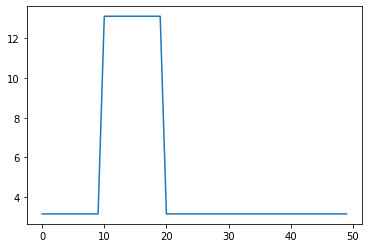

In [17]:
#Measure of Inequality - Consumption non-health 
Omega_c = c1_t / c2_t
plt.plot(Omega_c)

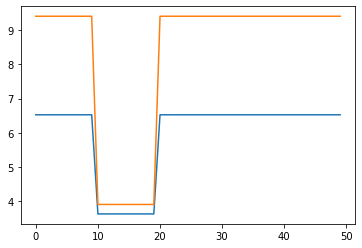

In [18]:
#Measure of Inequality - Consumption health 
Omega_h = h1_t / hT_t
Omega_hnopub = h1_t / h2_t
plt.plot(Omega_h)
plt.plot(Omega_hnopub)

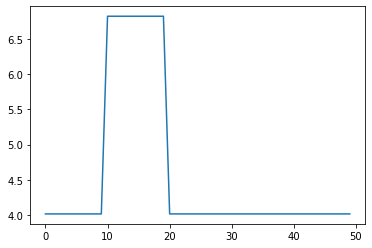

In [19]:
#Measure of Inequality - Total Consumption - health and non-health
Omega_T = (c1_t + h1_t) / (c2_t + hT_t)
plt.plot(Omega_T)